Notebook solo per avere template funzionati di metodi di opt

# Init del porblema

In [ ]:
import problems.golomb_simple as gl

# DRO
ic = [0.896508460944940632764, 0., 0., 0.000000000000013951082, 0.474817948848534454598, 0.]
period = 2.6905181697222775
# Number of satellites
N = 5

# Grid size
grid_size = 11

############### Constants
# Number of observations
M = 3
T = period*(M-1) # This makes it so that each observation is made after each period

mu = 0.01215058560962404  # M_L/(M_T + M_L)

scaling_factor = 1e-4

inflation_factor = 1.23
###############

# Instantiate UDP
udp = gl.orbital_golomb_array(n_sat=N, ic = ic, T = T, grid_size=grid_size, scaling_factor = scaling_factor, n_meas=M, inflation_factor = inflation_factor, mu=mu, verbose=False)

## Genetico

### Pygad

Migliore soluzione trovata: [-1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.]
Valore totale: 1.0


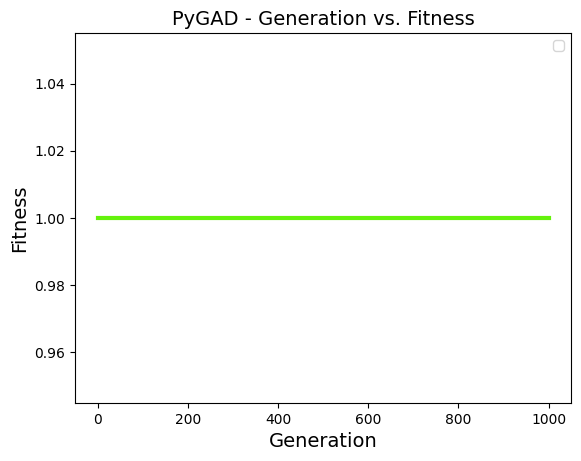

In [ ]:
import pygad

def fitness_function(ga_instancem,solution, solution_idx):
    return udp.fitness(solution)[0] + 1  # Return the first element of the fitness result

parametri_ga = {    # Parametri dell'algoritmo genetico:
    "num_generations": 1000,         # Numero di generazioni
    "num_parents_mating": 2,         # Numero di genitori selezionati per generare figli
    "fitness_func": fitness_function,# Funzione di fitness
    "sol_per_pop": 30,               # Dimensione della popolazione
    "num_genes": 30,                 # Numero di geni
    "gene_space": [(-1.0, 1.0)] * udp.n_sat * 6,    
    "parent_selection_type": "rws",  # Stochastic Universal Sampling
    "keep_parents": 2,               # Numero di genitori mantenuti
    "crossover_type": "single_point",# Tipo di crossover
    "mutation_type": "random",       # Tipo di mutazione
    "mutation_probability": 0.1     # Probabilità di mutazione
}

ga_instance = pygad.GA(**parametri_ga)
ga_instance.run()

# Risultati
soluzione, valore_fitness, _ = ga_instance.best_solution()
print("Migliore soluzione trovata:", soluzione)
print("Valore totale:", valore_fitness)
_ = ga_instance.plot_fitness() # Mostra grafico della convergenza

N_obs = 300
udp.plot_simulated_reconstruction(soluzione, N_obs, image_path="../data/star.jpg")

## Scipy

Migliore soluzione trovata: [-0.85064871 -0.00834981  0.97200166 -0.07430389 -0.32408529  0.28422857
  0.20375364  0.14409506 -0.65920698  0.68521857 -0.84558077  0.2837765
  0.55017188  0.44142594 -0.49074429 -0.59387158 -0.28547845 -0.10853354
  0.17799796  0.20286025  0.1507724  -0.67833248  0.11529495 -0.32095041
 -0.87122028 -0.04964903 -0.4741304  -0.56366721 -0.06941515 -0.53173049]
Valore totale: 0.9931972789115646
XY


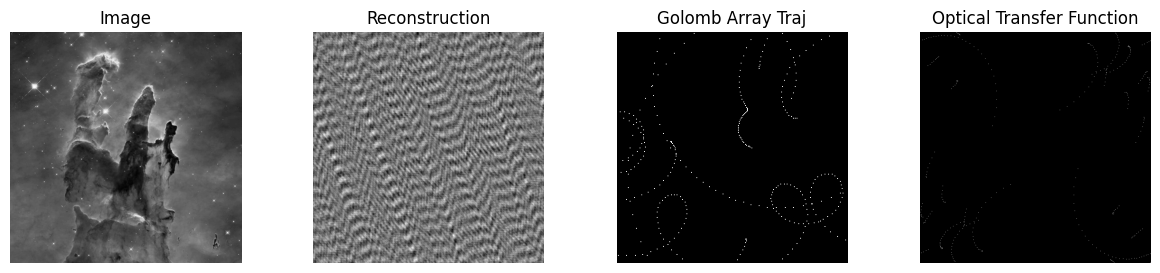

XZ


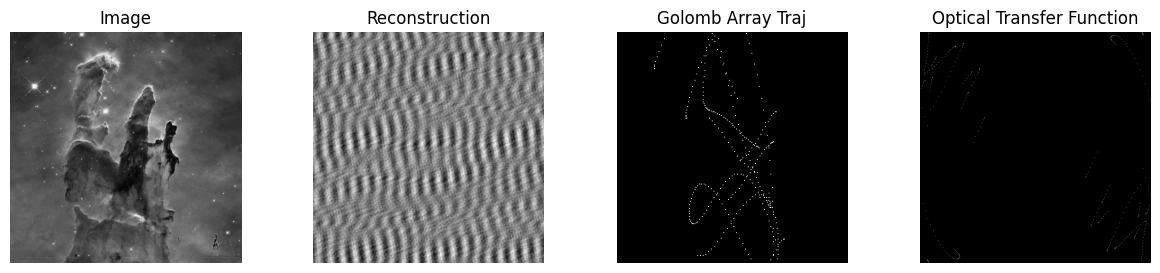

YZ


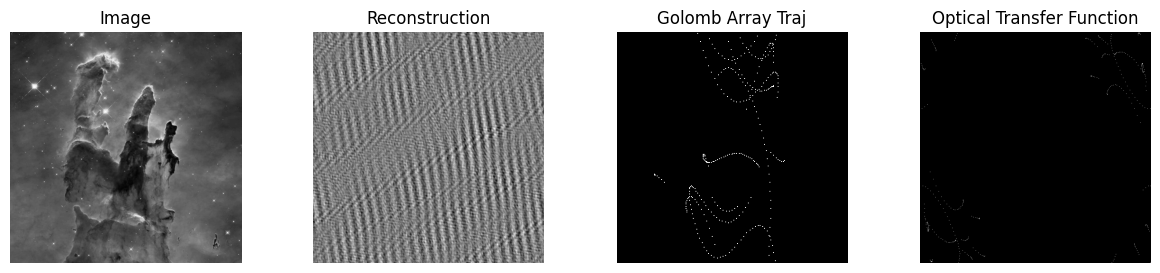

In [ ]:
from scipy.optimize import differential_evolution

def fitness_function(solution):
    return udp.fitness(solution)[0] + 1  # Return the first element of the fitness result

bounds = [(-1.0, 1.0)] * udp.n_sat * 6

result = differential_evolution(fitness_function, bounds, maxiter=3000, popsize=30, mutation=(0.5, 1), recombination=0.6)

soluzione = result.x
valore_fitness = result.fun
print("Migliore soluzione trovata:", soluzione)
print("Valore totale:", valore_fitness)

N_obs = 300
udp.plot_simulated_reconstruction(soluzione, N_obs, image_path="../data/star.jpg")